In [58]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
train_df = pd.read_csv('train.csv', parse_dates=['Date'])
test_df = pd.read_csv('test.csv', parse_dates=['Date'])

In [60]:
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [61]:
train_df.shape

(5760, 15)

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         5760 non-null   int64         
 1   Date                       5760 non-null   datetime64[ns]
 2   y                          5760 non-null   int64         
 3   Hour                       5760 non-null   int64         
 4   Temperature(�C)            5760 non-null   float64       
 5   Humidity(%)                5760 non-null   int64         
 6   Wind speed (m/s)           5760 non-null   float64       
 7   Visibility (10m)           5760 non-null   int64         
 8   Dew point temperature(�C)  5760 non-null   float64       
 9   Solar Radiation (MJ/m2)    5760 non-null   float64       
 10  Rainfall(mm)               5760 non-null   float64       
 11  Snowfall (cm)              5760 non-null   float64       
 12  Season

In [63]:
# adjust columns names
def func(x) :
    return x.split('(')[0].strip()

train_df.columns = list(map(func, list(train_df.columns)))
test_df.columns = list(map(func, list(test_df.columns)))
train_df.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

## EDA

In [36]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5760.0,2879.500000,1662.913107,0.0,1439.75,2879.50,4319.250,5759.00
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature,5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity,5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed,5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility,5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature,5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation,5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall,5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00


In [37]:
train_df.describe(include = 'O').T

,count,unique,top,freq
Seasons,5760,4,Winter,1440
Holiday,5760,2,No Holiday,5520
Functioning Day,5760,2,Yes,5513


In [38]:
# checking duplicates
train_df.duplicated().sum()

0

In [41]:
# adjusting Date 
train_df['Month'] = train_df['Date'].dt.month
train_df['Weekday'] = train_df['Date'].dt.day

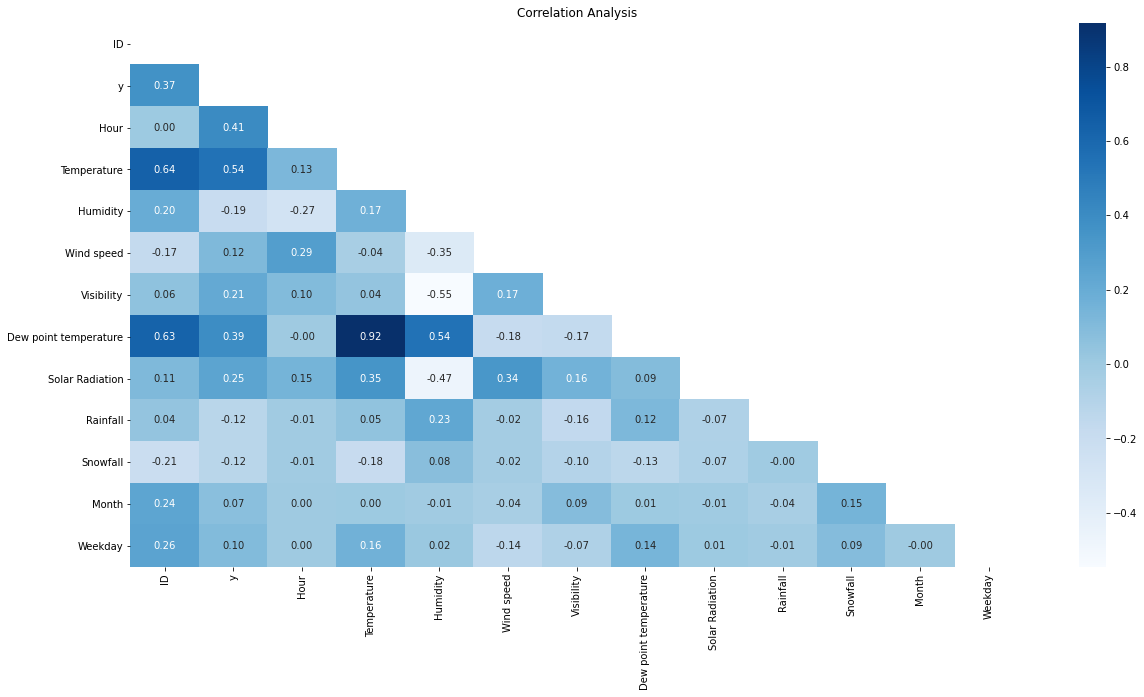

In [42]:
# correlation matrix and heatmap to stand on important features
corr_matrix = train_df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'Blues', mask = mask, annot = True)
plt.title("Correlation Analysis");

In [68]:
# func that draw histogram for numerical variables
def feature_distribution(col_name) :
    plt.figure()
    sns.histplot(train_df[col_name], bins = 20)
    plt.xlabel(col_name.upper())
    plt.ylabel('Count')
    plt.title(f'Distribution Of {col_name}')
plt.show()

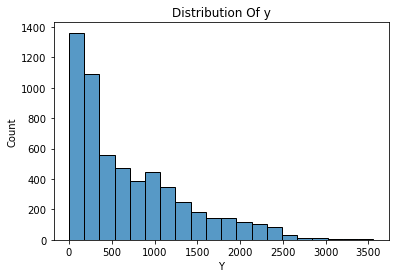

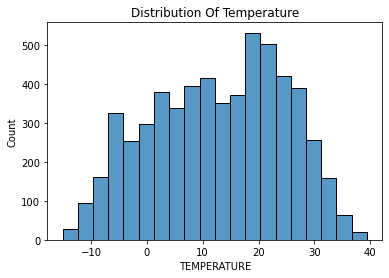

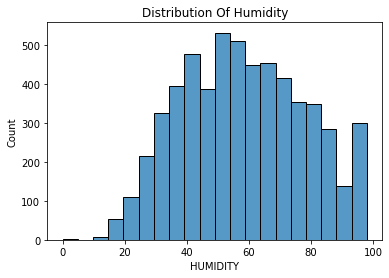

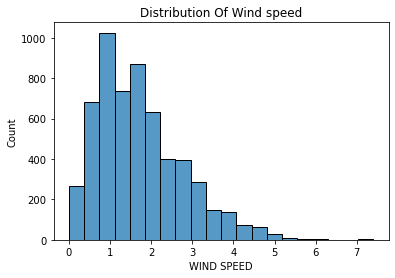

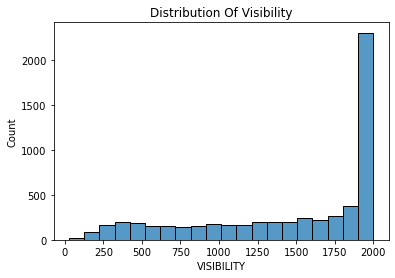

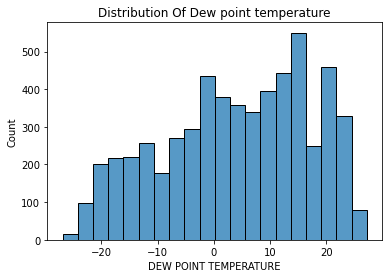

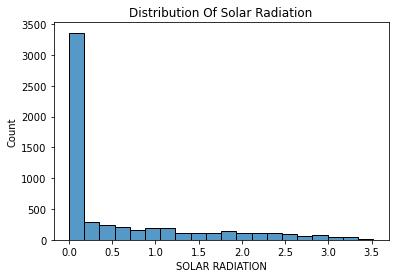

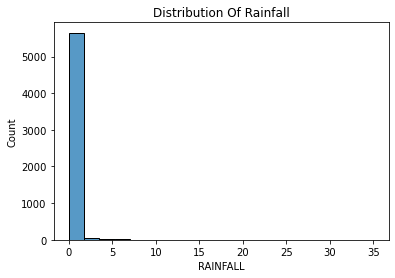

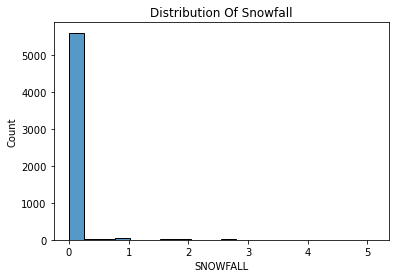

In [69]:
columns2draw = ['y', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation'
                , 'Rainfall', 'Snowfall']
for col in columns2draw :
    feature_distribution(col)

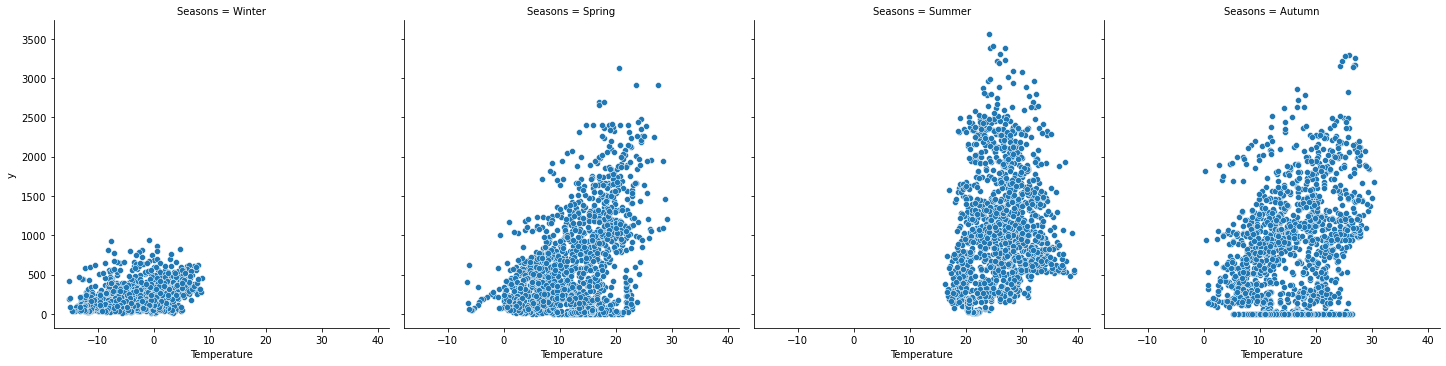

In [45]:
# temperature VS y
sns.relplot(data = train_df, x = 'Temperature', y = 'y', col = 'Seasons', kind = 'scatter');

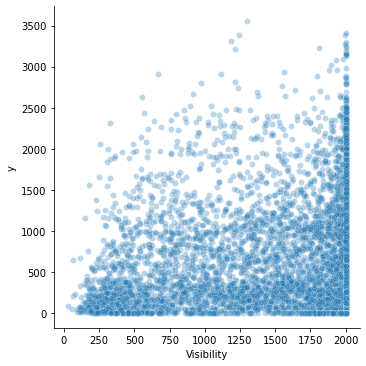

In [46]:
# temperature VS y
sns.relplot(data = train_df, x = 'Visibility', y = 'y', kind = 'scatter', alpha = 0.3);

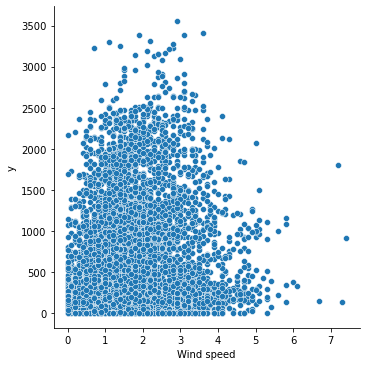

In [47]:
# temperature VS y
sns.relplot(data = train_df, x = 'Wind speed', y = 'y', kind = 'scatter');

In [73]:
# sns.color_palette()

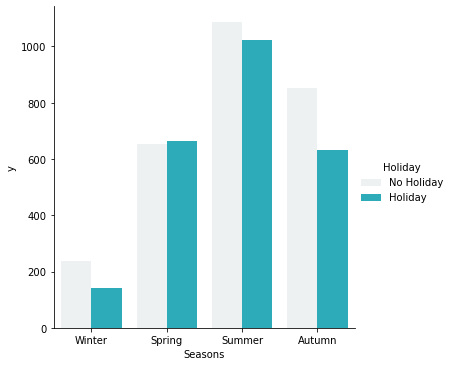

In [71]:
color = sns.color_palette()[9]
sns.catplot(data = train_df, x = 'Seasons', y = 'y', hue = 'Holiday', kind = 'bar', ci = None, color = color)

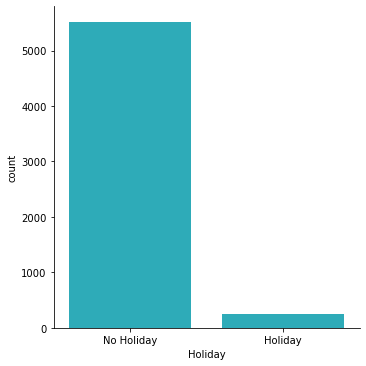

In [49]:
sns.catplot(data = train_df, x = 'Holiday', kind = 'count', ci = None, color = color)

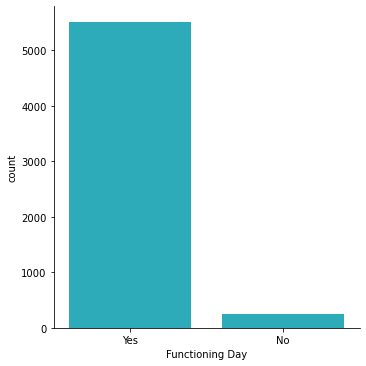

In [50]:
sns.catplot(data = train_df, x = 'Functioning Day', kind = 'count', ci = None, color = color)

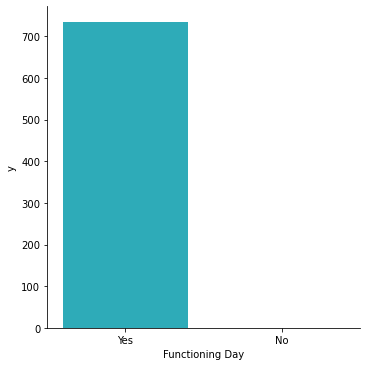

In [51]:
sns.catplot(data = train_df, x = 'Functioning Day', y = 'y', kind = 'bar', ci = None, color = color)

In [77]:
# train_df[train_df['Functioning Day'] == 'No']

In [52]:
train_df[train_df['Functioning Day'] == 'No'].groupby('Date')['Functioning Day'].count()

Date
2018-02-10    24
2018-03-11    24
2018-04-10    24
2018-06-10     7
2018-06-11    24
2018-09-10    24
2018-09-11    24
2018-09-18    24
2018-09-19    24
2018-10-05    24
2018-11-04    24
Name: Functioning Day, dtype: int64

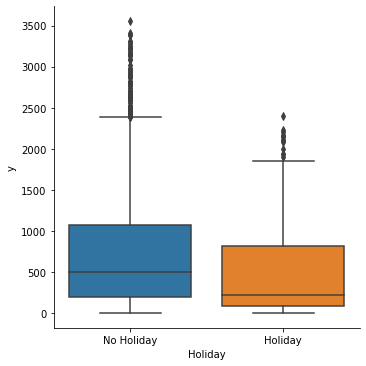

In [53]:
sns.catplot(data = train_df, x = 'Holiday', y = 'y', kind = 'box', ci = None)

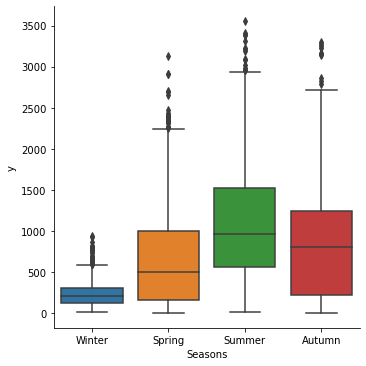

In [54]:
sns.catplot(data = train_df, x = 'Seasons', y = 'y', kind = 'box', ci = None)

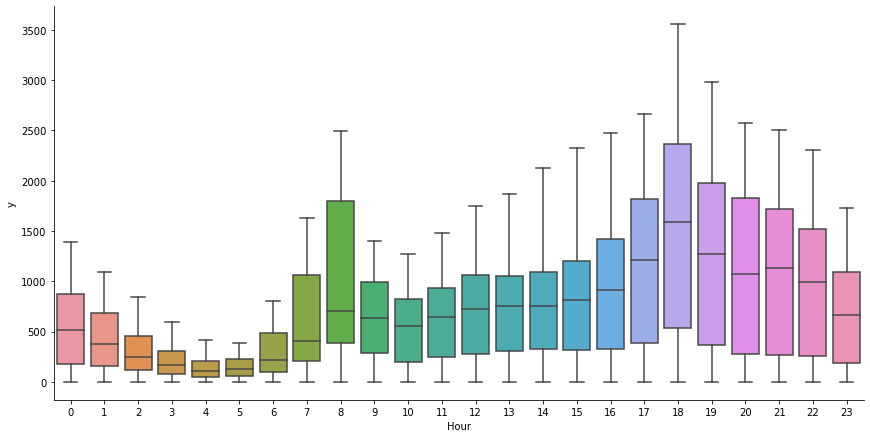

In [55]:
sns.catplot(data = train_df, x = 'Hour', y = 'y', kind = 'box', ci = None, height = 6, aspect = 2)

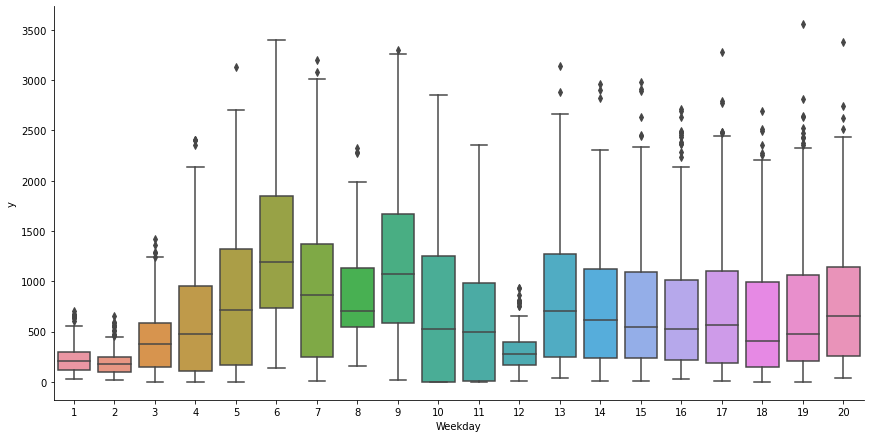

In [56]:
sns.catplot(data = train_df, x = 'Weekday', y = 'y', kind = 'box', ci = None, height = 6, aspect = 2)

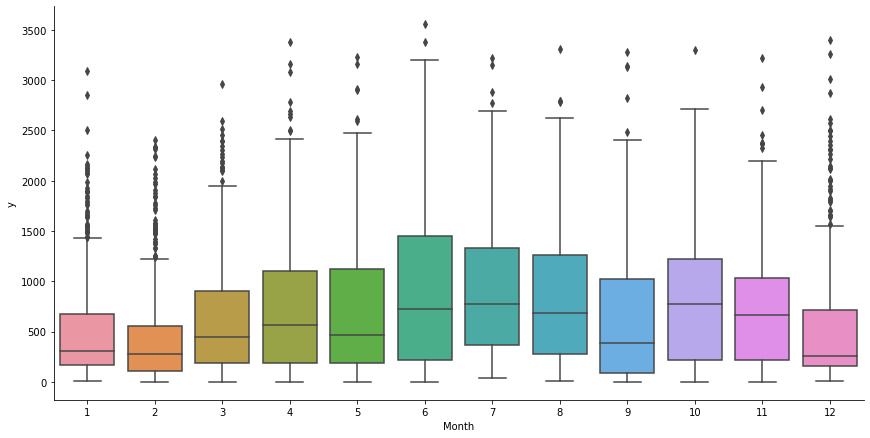

In [57]:
sns.catplot(data = train_df, x = 'Month', y = 'y', kind = 'box', ci = None, height = 6, aspect = 2)